In [ ]:
dict_datasetkey = {1:"Sri Lanka Dataset", 2: "Istanbul Uni Dataset"}
glob_feats = ['Subject ID', 
              'Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 
              'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 
              'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 
              'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 
              'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 
              'Degree of voice breaks', 'status']


glob_feats1 = [glob_feats[0]]
glob_feats1.extend(["mu_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["median_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["trim10mean_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["trim25mean_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["sd_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["iqr_" + s for s in glob_feats[1:-1]])
glob_feats1.extend(["mad_" + s for s in glob_feats[1:-1]])
glob_feats1.append(glob_feats[-1])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as spst

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://www.paperswithcode.com/paper/vigan-missing-view-imputation-with-generative
# https://github.com/chaoshangcs/VIGAN

In [ ]:
img_dir_train = "{}/drawings/all_together/training/".format(fdir)
img_dir_test = "{}/drawings/all_together/testing/".format(fdir)

In [ ]:
# import csv

# dict_ds = {}
# with open(ds2) as csvfile:
#   reader = csv.reader(csvfile)
#   i = 0
#   for row in reader:
#     if (i>0):
#       key = tuple([int(row[0]),int(row[-1])])
#       if key in dict_ds.keys():
#         dict_ds[key].append([float(t) for t in row[1:-1]])
#       else:
#         dict_ds[key] = [[float(t) for t in row[1:-1]]]    
    
#     i += 1

# glob_feats1 = [glob_feats[0]]
# glob_feats1.extend(["mu_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["median_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["trim10mean_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["trim25mean_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["sd_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["iqr_" + s for s in glob_feats[1:-1]])
# glob_feats1.extend(["mad_" + s for s in glob_feats[1:-1]])
# glob_feats1.append(glob_feats[-1])
# # print(glob_feats1)

# lst_towrite = []

# for key in dict_ds.keys():
#   sampls = np.asarray(dict_ds[key])
#   # print(len(sampls))
#   #mean
#   vals = list(np.mean(sampls,axis=0))

#   #median
#   vals.extend(list(np.median(sampls,axis=0)))

#   #trim10 mean
#   # print(list(spst.trim_mean(sampls,0.1,axis=0)))
#   vals.extend(list(spst.trim_mean(sampls,0.1,axis=0)))

#   #trim25 mean
#   # print(list(spst.trim_mean(sampls,0.25,axis=0)))
#   vals.extend(list(spst.trim_mean(sampls,0.25,axis=0)))

#   #sd
#   vals.extend(list(np.std(sampls,axis=0)))

#   #iqr
#   iqr = np.subtract(*np.percentile(sampls, [75, 25],axis=0))
#   # print(iqr)
#   # print(len(iqr))
#   vals.extend(iqr)
  
#   #mad
#   mad = np.mean(np.absolute(sampls - np.mean(sampls, axis=0)), axis=0)
#   # print(len(mad))
#   vals.extend(mad)

#   # print(len(vals))
#   # print(len(dict_ds[key][0]))
  
#   vals1 = [key[0]] #first subject id

#   vals1.extend(vals) #xtend with features
#   vals1.append(key[1]) #last class status

#   lst_towrite.append(vals1)
#   # break

# # print(len(lst_towrite[0]))
# with open('/content/iid_pd_final2.csv','w') as csvfile1:
#   writer = csv.writer(csvfile1) 
#   writer.writerow(glob_feats1)
#   for txtg in lst_towrite:
#     writer.writerow(txtg)

In [ ]:
# lst_towrite = []
# with open('/content/pd_test.txt','r') as fl:
#   l1 = fl.readline()
#   for line in fl:
#     line = line.strip()
#     line1 = line.split(',')
#     # newl = line1[:-2]
#     # newl.append(line1)
#     # print(len(newl))
#     # break
#     # lst_towrite.append(line1)
#     lst_towrite.append(line1)
# for t in lst_towrite:
#   print(len(t))
#   print(t)
#   break
# import csv
# # with open(ds1) as csvfile:
# #   reader = csv.reader(csvfile)
# #   for row in reader:
# #           # print(row['first_name'], row['last_name'])
# #       print(len(row))
# #       print(row)
# #       glob_feats = row
# #       break

# with open('/content/pd_test.csv','w') as csvfile1:
#   writer = csv.writer(csvfile1) 
#   writer.writerow(glob_feats)
#   for txtg in lst_towrite:
#     writer.writerow(txtg)

In [ ]:
fdir = "/content/drive/MyDrive/parkinsons_datasets"
str_i = "iid_"
# str_i = ""
ds1 = "{}/{}pd_final1.csv".format(fdir,str_i)
ds2 = "{}/{}pd_final2.csv".format(fdir,str_i)  #csv made same | txt has UPDRS extra
# ds_test = "/content/pd_test.csv"
# https://www.kaggle.com/rishidamarla/parkinson-s-prediction-using-xgbclassifier
# https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings
# https://www.kaggle.com/vvaseekaran/parkinsons-voice-data-sri-lanka
# https://www.kaggle.com/nidaguler/parkinsons-data-set/code
# https://pypi.org/project/scikit-fusion/

if(str_i!=""):
  glob_feats = glob_feats1

In [ ]:
# merged_ds.to_csv('/content/iid_final_merged.csv')

In [ ]:
df1 = pd.read_csv(ds1) 
df2 = pd.read_csv(ds2)
merged_ds = pd.concat([df1.drop([glob_feats[0]],axis=1),df4/1AY0e-g4_iaEfej8BDVKohnGGCXWH-aX5jQ15gj4jCVIzD72ldAMKBhQuBy42.drop([glob_feats[0]],axis=1)])

# df_test = pd.read_csv(ds_test)
from sklearn.preprocessing import MinMaxScaler
df1_feats = df1.drop([glob_feats[0],glob_feats[-1]],axis=1)
df2_feats = df2.drop([glob_feats[0],glob_feats[-1]],axis=1)
merged_ds_feats = merged_ds.drop([glob_feats[-1]],axis=1)

df1_feats =  pd.DataFrame(MinMaxScaler().fit_transform(df1_feats))
df2_feats =  pd.DataFrame(MinMaxScaler().fit_transform(df2_feats))
merged_ds_feats =  pd.DataFrame(MinMaxScaler().fit_transform(merged_ds_feats))
# df2_y = df2.status

# df_test_feats = df_test.drop([glob_feats[0],glob_feats[-1]],axis=1)
# df_test_y = df_test.status

FileNotFoundError: ignored

In [ ]:
print(len(merged_ds.status))
print(len(df2))

In [ ]:
#EDA
df1_feats.describe().T

In [ ]:
df2_feats.describe().T

In [ ]:
!!pip install pandas-profiling==2.7.1 

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df2, title="Pandas Profiling Report")

In [ ]:
sns.pairplot(df2.drop(glob_feats[0],axis=1),
             x_vars=[glob_feats[16],glob_feats[5]],
            y_vars=[glob_feats[22],glob_feats[11],glob_feats[24]],hue="status")

In [ ]:
# sns.pairplot(df2.drop(glob_feats[0],axis=1),
#              x_vars=glob_feats[1:27],
#             y_vars=glob_feats[1:27],hue="status")

sns.pairplot(df2.drop(glob_feats[0],axis=1),
             x_vars=[glob_feats[16],glob_feats[5]],
            y_vars=[glob_feats[22],glob_feats[11],glob_feats[14],glob_feats[24]],hue="status")

In [ ]:
def skewkurt(data):
  skew_kurt_df = pd.DataFrame(data=data.skew(), columns=["Skewness"])
  skew_kurt_df['Kurtosis'] = data.kurtosis()
  print(skew_kurt_df)
  fig,ax = plt.subplots(5,5,figsize=(26,10))
  ax=ax.flatten()
  for i in range ( 1, len(data.columns)):
      sns.kdeplot(data.iloc[:,i],ax=ax[i])
      ax[i].axvline(x=data.iloc[:,i].mean(),ymin=0,ymax=1,color="red")
  plt.tight_layout()
  plt.show()    

                                         Skewness  Kurtosis
Subject ID                               0.000000 -1.200000
mu_Jitter(local)                         1.326186  2.643026
mu_Jitter(local, absolute)               0.573445  0.327524
mu_Jitter (rap)                          1.740301  4.340753
mu_Jitter (ppq5)                         1.434018  3.036029
...                                           ...       ...
mad_Standard deviation of period         1.790284  3.852786
mad_Fraction of locally unvoiced frames -0.084326 -0.602318
mad_Number of voice breaks               1.492663  1.815110
mad_Degree of voice breaks               0.416427 -0.304490
status                                   0.000000 -2.108108

[184 rows x 2 columns]


IndexError: ignored

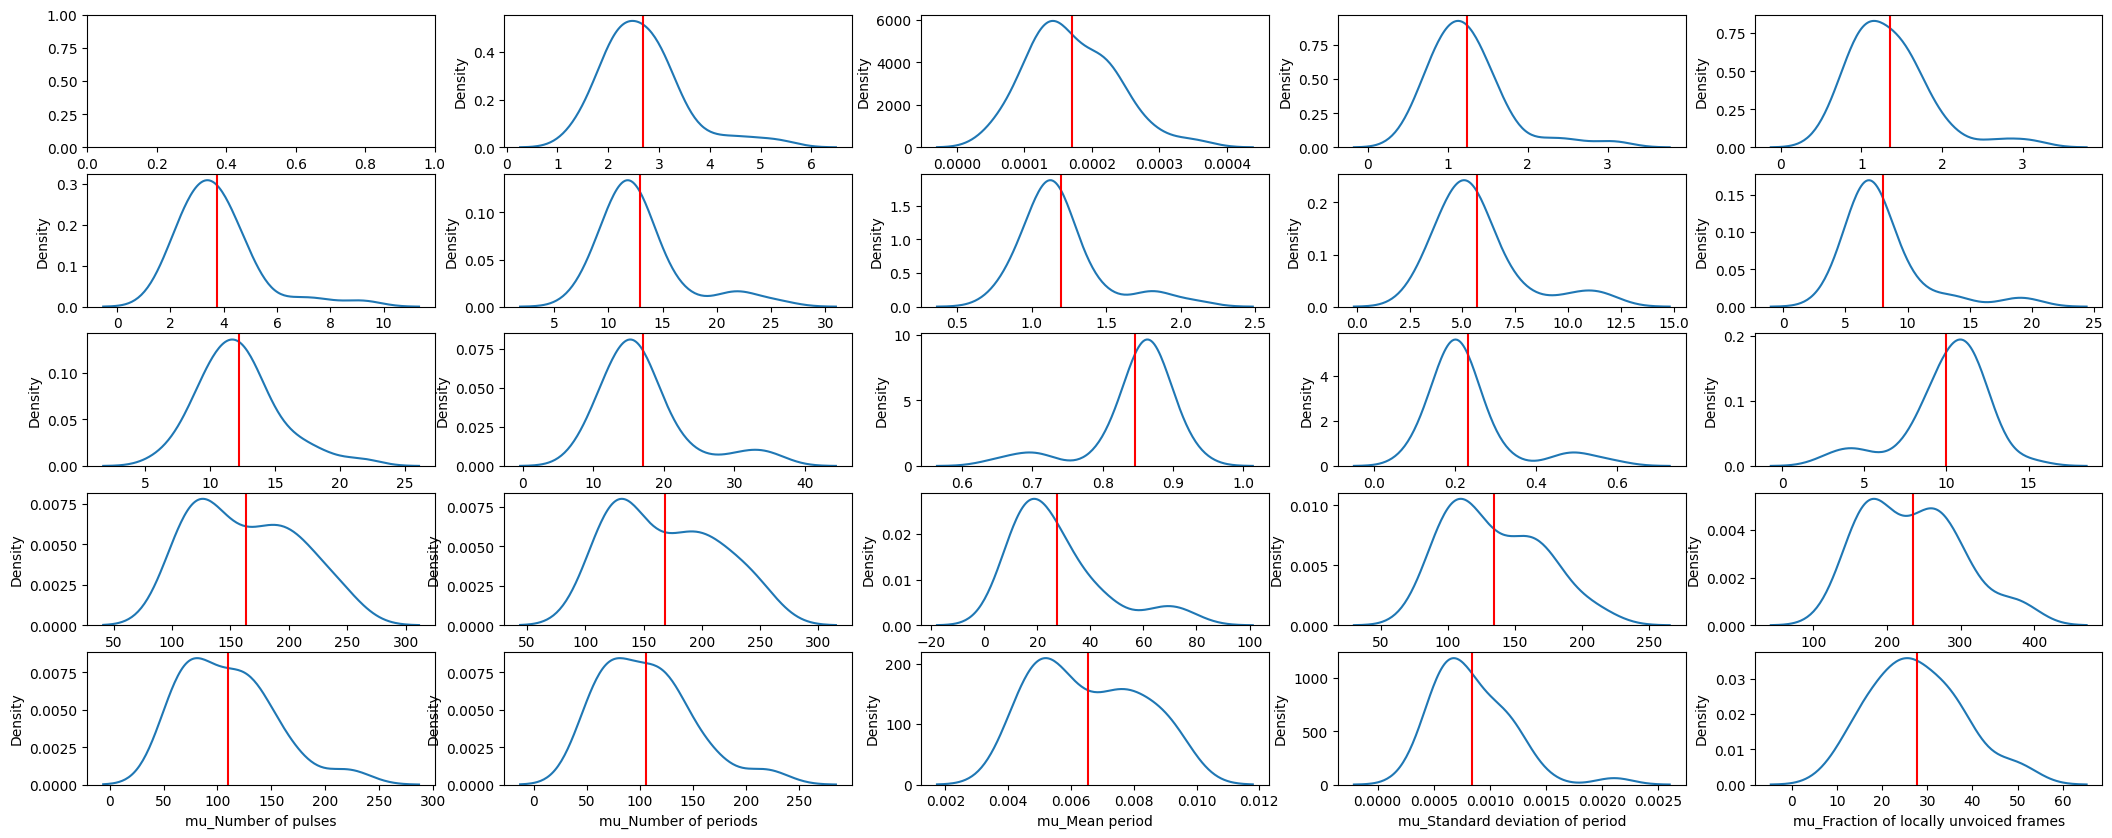

In [ ]:
skewkurt(df2)
# skewkurt(merged_ds)

In [ ]:
def box_kde_plts_all_feat(data,features1):

  for features in features1:
    try:
      data[features].plot(kind="box",figsize=[15,5])
      plt.ylim(0,0.5)
      plt.hlines(0.1,0,6)
      # All amplitude measure factors have outliers and 
      data[features].plot(kind="kde",figsize=[10,5])
      plt.xlim(-0.1,0.5)
      plt.ylim(0,30)
      plt.show()
      plt.clf()
      # measure shimmer DDA seems to be normally distributed 
    except:
      print("err")

In [ ]:
box_kde_plts_all_feat(df1,glob_feats)

In [ ]:
# refer https://www.kaggle.com/adiyabhalla/eda-and-classification-modelling for writing

In [ ]:
from sklearn.model_selection import train_test_split,LeaveOneOut, LeavePOut, cross_validate, KFold

def traintest_split(data_feats,data,frac=0.1):
  x = data_feats
  y = data.status
  # print(y.shape)
  x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=frac,shuffle=True)
  return x_train, x_test,y_train,y_test


from sklearn.neural_network import MLPClassifier

In [ ]:
def shuffle(merged_x_train,merged_y_train,key):
  merged_whole = merged_x_train
  merged_whole[key] = merged_y_train
  merged_whole = merged_whole.sample(frac=1)
  return merged_whole.drop([key],axis=1),merged_whole[key]

In [ ]:
# https://algotrading101.com/learn/train-test-split/

# loo = LeaveOneOut()
# loop = LeavePOut(p=2)

kfold = KFold(n_splits=10,shuffle=True)

# df_imputed = pd.read_csv(fdir + "/Imputed_data_train.csv")
df_imputed = pd.read_csv(fdir + "/Imputed_data_merge.csv")
# display(df_imputed['182'])
df_imputed_y = df_imputed['182']
df_imputed_feats = df_imputed.drop(['182'],axis=1)

# ds_train = pd.DataFrame(MinMaxScaler().fit_transform(df_imputed_feats))
ds_train = df_imputed_feats
ds_y_train = df_imputed_y

ds_train, ds_y_train = shuffle(ds_train,ds_y_train,'182')

# df_imputed_test = pd.read_csv(fdir + "/Imputed_data_test.csv")
df_imputed_test = pd.read_csv(fdir + "/Imputed_data_test_merge.csv")
ds_test = df_imputed_test.drop(['182'],axis=1)
# ds_test = pd.DataFrame(MinMaxScaler().fit_transform(ds_test))
ds_y_test = df_imputed_test['182']
ds_test, ds_y_test = shuffle(ds_test,ds_y_test,'182')

# ds_train,ds_test,ds_y_train,ds_y_test = traintest_split(merged_ds_feats,merged_ds)

# ds_train,ds_test,ds_y_train,ds_y_test = traintest_split(df2_feats,df2)


X = np.asarray(ds_train)
y = np.array(ds_y_train)
# print(y.shape)



In [ ]:
all_test_accs = {'lr':[],'nb':[],'knn_4':[],'knn_6':[],'svm_poly':[],'svm_rbf':[],'dt':[],'rf':[],'ada':[],'gb':[],'xgb':[],'mlp':[]}

# for train_index, test_index in kfold.split(X):

#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
if(1==1):
    X_train, X_test = ds_train,ds_test
    y_train,y_test = ds_y_train, ds_y_test
    #logistic reg
    # temp_lst = []

    acc_lr = logistic_regression(X_train,X_test,y_train,y_test)
    all_test_accs['lr'].append(acc_lr)
    # temp_lst.append(acc_lr)

    acc_nb = naive_bayes(X_train,X_test,y_train,y_test)
    all_test_accs['nb'].append(acc_nb)
    # temp_lst.append(acc_nb)

    # acc_knn = knn_bestk(X_train,X_test,y_train,y_test,kmax=4)
    # all_test_accs['knn_4'].append(acc_knn)

    acc_knn = knn_bestk(X_train,X_test,y_train,y_test,kmax=6)
    all_test_accs['knn_6'].append(acc_knn)
    # temp_lst.append(acc_knn)


    # acc_svm = svm(X_train,X_test,y_train,y_test,kern='poly')
    # all_test_accs['svm_poly'].append(acc_svm)
    # temp_lst.append(acc_svm)
    
    acc_svm = svm(X_train,X_test,y_train,y_test,kern='rbf')
    all_test_accs['svm_rbf'].append(acc_svm)
    
    #decison tree
    acc_dt = decision_tree(X_train,X_test,y_train,y_test)
    all_test_accs['dt'].append(acc_dt)
    # temp_lst.append(acc_dt)    
    
    #random forest
    acc_rf = random_forest(X_train,X_test,y_train,y_test)
    all_test_accs['rf'].append(acc_rf)
    # temp_lst.append(acc_rf)

    #addaboost
    acc_ada = adaboost(X_train,X_test,y_train,y_test)
    all_test_accs['ada'].append(acc_ada)
    # temp_lst.append(acc_ada)

    #gradient boost
    acc_gb = gradient_boost(X_train,X_test,y_train,y_test)
    all_test_accs['gb'].append(acc_gb)
    # temp_lst.append(acc_gb)

    #xgboost
    acc_xgb = xgboost_classifier(X_train,X_test,y_train,y_test)
    all_test_accs['xgb'].append(acc_xgb)
    # temp_lst.append(acc_xgb)
    # print(max(temp_lst))

    #MLP 
    mlp_cl = MLPClassifier(random_state=1, max_iter=800,hidden_layer_sizes=(200,100,50,25),solver='adam').fit(X_train, y_train)
    acc_mlp = mlp_cl.score(X_test,y_test)
    all_test_accs['mlp'].append(acc_mlp)
    # temp_lst.append(acc_mlp)
    
    #RNN
    #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/402_RNN_classifier.py


In [ ]:
print(list(kfold.split(X))[0][1])

[ 2 28 29 30 43]


In [ ]:
for key in all_test_accs.keys():
  # print("for {} we have mean accuracy {} with std {}".format(key,np.mean(all_test_accs[key]),np.std(all_test_accs[key])))
  # print("{} {}".format(key, round(np.mean(all_test_accs[key]),3)))
  if (len(all_test_accs[key])>0): 
    print("{}".format(round(np.mean(all_test_accs[key]),3)))
#   print(np.array(all_test_accs[key]).argmax())
#   train_inx = kfold.split(X)[np.array(all_test_accs[key]).argmax()][0]


In [ ]:
# MLP for merged
# mlp_cl = MLPClassifier(random_state=1, max_iter=800,hidden_layer_sizes=(200,100,50,25),solver='adam').fit(ds_train, ds_y_train)
# acc_mlp = mlp_cl.score(ds_test,ds_y_test)
# print(acc_mlp)

# xgboost for non merged
model_gbcl = XGBClassifier().fit(ds_train, ds_y_train)
pred_test_y_gbcl = model_gbcl.predict_proba(ds_test)
# print(model_gbcl.score(ds_test,ds_y_test))
# pred_test_y_gbcl = mlp_cl.predict_proba(ds_test)
fpr_lr, tpr_lr, threshold_lr = roc_curve(ds_y_test,pred_test_y_gbcl[:,1])
print(auc(fpr_lr,tpr_lr))

0.8126153846153847


In [ ]:
fpr_lr_m = fpr_lr #auc roc 0.75
tpr_lr_m = tpr_lr

In [ ]:
 # Area under the curve, MLP Model:1.00
# ROC score for MLP Model: 0.83
plt.figure(figsize = [10,5])
plt.plot(fpr_lr_m,tpr_lr_m, label = "MLP, MSR-HD dataset, AUC = 0.693")
plt.plot(fpr_lr,tpr_lr, label = "MLP, MSR+SL-HD dataset, AUC = 0.813")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.title("ROC curve")
plt.show()

In [ ]:
# https://stats.stackexchange.com/questions/27454/how-does-leave-one-out-cross-validation-work-how-to-select-the-final-model-out
# https://datascience.stackexchange.com/questions/45041/what-is-difference-between-leave-one-subject-out-and-leave-one-out-cross-validat
# https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/
# https://github.com/adachille/parkinsons-detector
# https://www.overleaf.com/7524475375cmhpfhmrgwtf

In [ ]:
print(len(x_train_1))

26


In [ ]:
# x_train_1,x_test_1,y_train_1,y_test_1 = traintest_split(df2_feats,df2)
# merged_x_train = x_train_1
# merged_x_train= pd.concat([x_train_1,df1_feats])
# merged_y_train = pd.concat([y_train_1,df1.status])
# # display(merged_x_train)

# merged_whole = merged_x_train
# merged_whole['status'] = merged_y_train
# merged_whole = merged_whole.sample(frac=1)

# merged_x_train = merged_whole.drop(['status'],axis=1)
# merged_y_train = merged_whole['status']
# # display(merged_x_train)

# print(len(merged_x_train))
# print(len(merged_y_train))
# print(len(x_train_1))
# print(len(x_test_1))

In [ ]:
adaboost(x_train_1,x_test_1,y_train_1,y_test_1)

In [ ]:
adaboost(merged_x_train,x_test_1,merged_y_train,y_test_1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, auc, roc_auc_score, roc_curve

def logistic_regression(x_train,x_test,y_train,y_test,if_not_sloo=False):
  model_lr = LogisticRegression(max_iter=1500)
  # fitting the model 
  model_lr.fit(x_train,y_train)
  pred_y_train_lr = model_lr.predict(x_train)
  pred_y_test_lr =  model_lr.predict(x_test)


  
  # classification report and confusion matrix 
  if if_not_sloo is True:
    
    print("Logistic Regression accuracy on the train set:",accuracy_score(pred_y_train_lr,y_train))
    print("Logistic Regression accuracy on the test set :",accuracy_score(pred_y_test_lr,y_test))

    cm_lr = confusion_matrix(y_test,pred_y_test_lr,labels=[1,0])
    cm_lr_df = pd.DataFrame(cm_lr,columns=(i for i in ["Predicted 1","Predicted 0"] ),
                          index = (i for i in [1,0]))
    sns.heatmap(cm_lr_df,annot= True, cmap= "YlGnBu")
    print("Classification report for LR model \n\n",classification_report(y_test,pred_y_test_lr,labels=[1,0]))
    proab_test_y_lr = model_lr.predict_proba(x_test) 
    fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,proab_test_y_lr[:,1])
    print("Area under the curve, Logistic Regression Model:%.2f"% auc(fpr_lr,tpr_lr))
    print("ROC score for Logistic Regression Model: %.2f"%roc_auc_score(y_test,pred_y_test_lr))
    plt.figure(figsize = [10,5])
    plt.plot(fpr_lr,tpr_lr, label = "logistic Regression")
    plt.plot([0,1],[0,1],"k--")
    #plt.plot(threshold_lr.round(2))
    plt.legend()
    plt.show()
  
  return accuracy_score(pred_y_test_lr,y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(x_train,x_test,y_train,y_test,if_not_sloo=False):
  model_nb = GaussianNB()
  # training the model 
  model_nb.fit(x_train,y_train)
  pred_train_y_nb = model_nb.predict(x_train)
  pred_test_y_nb = model_nb.predict(x_test)

  if if_not_sloo is False:
    return accuracy_score(y_test,pred_test_y_nb)

  print("Accuracy of NB on train set :", accuracy_score(y_train,pred_train_y_nb))
  print("Accuracy of NB on test set :", accuracy_score(y_test,pred_test_y_nb))
  # NB has a lesser accuracy than logistic regression 
  # checking the classification report and confusion matrix 
  cm_nb = confusion_matrix(y_test,pred_test_y_nb, labels=[1,0])
  cm_nb_df = pd.DataFrame(cm_nb,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_nb_df, annot=True, cmap="YlGnBu")
  print("Classification report Naive Bayes:\n",classification_report(y_test,pred_test_y_nb,labels=[1,0]))
  proab_test_y_nb = model_nb.predict_proba(x_test) 
  fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test,proab_test_y_nb[:,1])
  print("Area under the curve, Naive Bayes Model:%.2f"% auc(fpr_nb,tpr_nb))
  print("ROC score for naive Bayes Model: %.2f"%roc_auc_score(y_test,pred_test_y_nb))
  plt.figure(figsize = [10,5])
  plt.plot(fpr_nb,tpr_nb,label="Naive Bayes")
  #plt.plot(threshold_lr)
  #plt.plot(threshold_nb)
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_bestk(x_train,x_test,y_train,y_test,kmax=4,if_not_sloo=False):
  model_knn = KNeighborsClassifier(n_neighbors=kmax,weights = "distance")
  model_knn.fit(x_train,y_train)
  pred_train_y_knn=model_knn.predict(x_train)
  pred_test_y_knn = model_knn.predict(x_test)
  
  if if_not_sloo is False:
    return accuracy_score(y_test,pred_test_y_knn)

  print("Accuracy of KNN on train set :", accuracy_score(y_train,pred_train_y_knn))
  print("Accuracy of KNN on test set :", accuracy_score(y_test,pred_test_y_knn))
  # 87 percent accuracy, i,proved accuracy with min max scalert to 91 
  # classification report and confusion matrix 
  cm_knn = confusion_matrix(y_test,pred_test_y_knn, labels=[1,0])
  cm_knn_df = pd.DataFrame(cm_knn,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_knn_df, annot=True, cmap="YlGnBu")
  print("\nClassification report KNN:\n",classification_report(y_test,pred_test_y_knn,labels=[1,0]))
  # Recall 95%  improved to 97 % with min  max scaler 
  # F1 score 91 , improved to 95  with min max scaler 
  # Accuracy 90 %  improved to 91 with min max scaler 
  # checking ROC and AUC
  proab_test_y_knn = model_knn.predict_proba(x_test) 
  fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,proab_test_y_knn[:,1])
  print("Area under the curve, KNN Model:%.2f"% auc(fpr_knn,tpr_knn))
  print("ROC score for KNN Model: %.2f"%roc_auc_score(y_test,pred_test_y_knn))
  plt.figure(figsize = [10,5])
  # plt.plot(fpr_lr,tpr_lr, label = "logistic Regression")
  # plt.plot(fpr_nb,tpr_nb,label="Naive Bayes")
  plt.plot(fpr_knn,tpr_knn,label="KNN")
  #plt.plot(threshold_lr)
  #plt.plot(threshold_nb)
  #plt.plot(threshold_knn)
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.svm import SVC

def svm(x_train,x_test,y_train,y_test,gam='scale',kern="rbf",if_not_sloo = False):
  model_svc = SVC(gamma=gam,kernel=kern,C=1, probability=True)
  model_svc.fit(x_train,y_train)
  pred_train_y_svc=model_svc.predict(x_train)
  pred_test_y_svc=model_svc.predict(x_test)
  
  if if_not_sloo is False:
    return accuracy_score(y_test,pred_test_y_svc)

  print("Accuracy on the train set SVC :",accuracy_score(y_train,pred_train_y_svc))
  print("Accuracy on the test set SVC :",accuracy_score(y_test,pred_test_y_svc))
  # confusion Matrix and Classification report 
  cm_svc = confusion_matrix(y_test,pred_test_y_svc, labels=[1,0])
  cm_svc_df = pd.DataFrame(cm_svc,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_svc_df, annot=True, cmap="YlGnBu")
  print("\nClassification report SVC:\n",classification_report(y_test,pred_test_y_svc,labels=[1,0]))
  #Recall 97 - recall increased to 1 with in exp 2 (with min max scaler)
  # Accuracy 91 - reduced 75 in exp2
  # F1 score 95 - reduced to 86 
  # ROC and AUC ROC curve 
  proab_test_y_svc = model_svc.predict_proba(x_test) 
  fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test,proab_test_y_svc[:,1])
  print("Area under the curve, SVC Model:%.2f"% auc(fpr_svc,tpr_svc))
  print("ROC score for SVC Model: %.2f"%roc_auc_score(y_test,pred_test_y_svc))
  plt.figure(figsize = [10,5])
  plt.plot(fpr_svc,tpr_svc,label="SVC")
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

def decision_tree(x_train,x_test,y_train,y_test,crit="gini",maxd=3,rs=1,if_not_sloo = False):
  model_dt = DecisionTreeClassifier(criterion=crit,max_depth=maxd, random_state=rs)
  model_dt.fit(x_train,y_train)
  if if_not_sloo is False:
    return model_dt.score(x_test,y_test)
  print("Training Set Score:", model_dt.score(x_train,y_train))
  print("Test Set Score", model_dt.score(x_test,y_test))
  pred_test_y_dt = model_dt.predict(x_test)
  # visualizing the decision tree 
  plt.figure(figsize=[10,5])
  plot_tree(model_dt,class_names=["1","0"],feature_names=list(x_train))
  cm_dt = confusion_matrix(y_test,pred_test_y_dt, labels=[1,0])
  cm_dt_df = pd.DataFrame(cm_dt,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_dt_df, annot=True, cmap="YlGnBu")
  print("\nClassification report KNN:\n",classification_report(y_test,pred_test_y_dt,labels=[1,0]))
  # Checking the list of important feature 
  imp_feature=pd.DataFrame(model_dt.feature_importances_, columns=["Important Feature"],index=x_train.columns)
  imp_feature['Important Feature'].loc[imp_feature['Important Feature']>0]
  # ROC and AUC curve 
  proab_test_y_dt = model_dt.predict_proba(x_test) 
  fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test,proab_test_y_dt[:,1])
  print("Area under the curve, DT Model:%.2f"% auc(fpr_dt,tpr_dt))
  print("ROC score for DT  Model: %.2f"%roc_auc_score(y_test,pred_test_y_dt))
  plt.figure(figsize = [10,5])

  plt.plot(fpr_dt,tpr_dt,label="Decision Tree")
  #plt.plot(threshold_lr)
  #plt.plot(threshold_nb)
  #plt.plot(threshold_knn)
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(x_train,x_test,y_train,y_test,if_not_sloo = False):
  model_rf = RandomForestClassifier(n_estimators=50,random_state=1,max_features=12)
  model_rf.fit(x_train,y_train)
  if if_not_sloo is False:
    return model_rf.score(x_test,y_test)

  print("Accuracy on train set Random Forest",model_rf.score(x_train,y_train))
  print("Accuracy on test set Random Forest",model_rf.score(x_test,y_test))
  pred_test_y_rf = model_rf.predict(x_test)
  print("Accuracy on the test set Random Forest",accuracy_score(y_test,pred_test_y_rf))
  # 89% accuracy, 
  # confusion matrix and Classification report
  cm_rf = confusion_matrix(y_test,pred_test_y_rf, labels=[1,0])
  cm_rf_df = pd.DataFrame(cm_rf,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_rf_df, annot=True, cmap="YlGnBu")
  print("\nClassification report Random Forest :\n",classification_report(y_test,pred_test_y_rf,labels=[1,0]))
  proab_test_y_rf = model_rf.predict_proba(x_test) 
  fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,proab_test_y_rf[:,1])
  #print("Area under the curve RF Model ", auc(fpr_rf,tpr_rf))
  print("ROC score for RF  Model: %.2f"%roc_auc_score(y_test,pred_test_y_rf))
  plt.figure(figsize = [10,5])
  plt.plot(fpr_rf,tpr_rf,label="Random Forest")
  #plt.plot(threshold_lr)
  #plt.plot(threshold_nb)
  #plt.plot(threshold_knn)
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

def bagging_classify(x_train,x_test,y_train,y_test,if_not_sloo = False):
  model_bgcl = BaggingClassifier(base_estimator=model_rf,n_estimators=50,random_state=0)
  model_bgcl.fit(x_train,y_train)
  if if_not_sloo is False:
    return model_bgcl.score(x_test,y_test)
  print("Accuracy on train set Bagging Classifier",model_bgcl.score(x_train,y_train))
  print("Accuracy on test set Bagging Classifier",model_bgcl.score(x_test,y_test))
  pred_test_y_bgcl = model_bgcl.predict(x_test)
  print("Accuracy on the test set Bagging Classifier",accuracy_score(y_test,pred_test_y_bgcl))

  cm_bgcl = confusion_matrix(y_test,pred_test_y_bgcl, labels=[1,0])
  cm_bgcl_df = pd.DataFrame(cm_bgcl,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_bgcl_df, annot=True, cmap="YlGnBu")
  print("\nClassification report Bagging Classifier with base estimator as RF :\n",classification_report(y_test,pred_test_y_bgcl,labels=[1,0]))
  # Recall of 1 - recall reduced to 92 in exp 2  
  # F1 score of 95 - reduced to 93 in exp 2 
  proab_test_y_bgcl = model_bgcl.predict_proba(x_test) 
  fpr_bgcl, tpr_bgcl, threshold_bgcl = roc_curve(y_test,proab_test_y_bgcl[:,1])
  #print("Area under the curve Bagging classifier with RF as base Model ", auc(fpr_bgcl,tpr_bgcl))
  print("ROC score for Bagging classifier with RF as base Model: %.2f"%roc_auc_score(y_test,pred_test_y_bgcl))
  plt.figure(figsize = [15,10])
  plt.plot(fpr_bgcl,tpr_bgcl,label="Bagging Clf (RF)")
  #plt.plot(threshold_lr)
  #plt.plot(threshold_nb)
  #plt.plot(threshold_knn)
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost(x_train,x_test,y_train,y_test,nest=50,rs=0,if_not_sloo=False):
  model_abcl = AdaBoostClassifier(n_estimators=nest,random_state=rs)
  model_abcl.fit(x_train,y_train)
  if if_not_sloo==False:
    return model_abcl.score(x_test,y_test)
    
  print("Accuracy on train set Adaboost Classifier",model_abcl.score(x_train,y_train))
  print("Accuracy on test set Adaboost Classifier",model_abcl.score(x_test,y_test))
  pred_test_y_abcl = model_abcl.predict(x_test)
  print("Accuracy on the test set Adaboost Classifier",accuracy_score(y_test,pred_test_y_abcl))
  # confusion matrix and Classification report
  cm_abcl = confusion_matrix(y_test,pred_test_y_abcl, labels=[1,0])
  cm_abcl_df = pd.DataFrame(cm_abcl,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_abcl_df, annot=True, cmap="YlGnBu")
  print("\nClassification report Adaboost Classifier  :\n",classification_report(y_test,pred_test_y_abcl,labels=[1,0]))
  proab_test_y_abcl = model_abcl.predict_proba(x_test) 
  fpr_abcl, tpr_abcl, threshold_abcl = roc_curve(y_test,proab_test_y_abcl[:,1])
  print("ROC score for Adaboost classifier : %.2f"%roc_auc_score(y_test,pred_test_y_abcl))
  plt.figure(figsize = [15,10])

  plt.plot(fpr_abcl,tpr_abcl,label="Adaboost Classifier")
  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def gradient_boost(x_train,x_test,y_train,y_test,nest=50,rs=0,if_not_sloo=False):
  model_gbcl = GradientBoostingClassifier(n_estimators=nest,random_state=rs)
  model_gbcl.fit(x_train,y_train)
  if if_not_sloo==False:
    return model_gbcl.score(x_test,y_test)
    
  print("Accuracy on train set GradientBoosting Classifier",model_gbcl.score(x_train,y_train))
  print("Accuracy on test set GradientBoosting Classifier",model_gbcl.score(x_test,y_test))
  pred_test_y_gbcl = model_gbcl.predict(x_test)
  print("Accuracy on the test set GradientBoosting Classifier",accuracy_score(y_test,pred_test_y_gbcl))
  # confusion matrix and Classification report
  cm_gbcl = confusion_matrix(y_test,pred_test_y_gbcl, labels=[1,0])
  cm_gbcl_df = pd.DataFrame(cm_gbcl,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_gbcl_df, annot=True, cmap="YlGnBu")
  print("\nClassification report Gradient Boosting Classifier  :\n",classification_report(y_test,pred_test_y_gbcl,labels=[1,0]))
  proab_test_y_gbcl = model_gbcl.predict_proba(x_test) 
  fpr_gbcl, tpr_gbcl, threshold_gbcl = roc_curve(y_test,proab_test_y_gbcl[:,1])
  print("ROC score for Gradient Boosting classifier : %.2f"%roc_auc_score(y_test,pred_test_y_gbcl))
  plt.figure(figsize = [15,10])
  plt.plot(fpr_gbcl,tpr_gbcl,label="Gradient Boosting")

  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
from xgboost import XGBClassifier

def xgboost_classifier(x_train,x_test,y_train,y_test,if_not_sloo=False):
  model_gbcl = XGBClassifier().fit(x_train, y_train)
  if if_not_sloo==False:
    return model_gbcl.score(x_test,y_test)
  print("Accuracy on train set XGB Classifier",model_gbcl.score(x_train,y_train))
  print("Accuracy on test set CGB Classifier",model_gbcl.score(x_test,y_test))
  pred_test_y_gbcl = model_gbcl.predict(x_test)
  print("Accuracy on the test set GradientBoosting Classifier",accuracy_score(y_test,pred_test_y_gbcl))
  # confusion matrix and Classification report
  cm_gbcl = confusion_matrix(y_test,pred_test_y_gbcl, labels=[1,0])
  cm_gbcl_df = pd.DataFrame(cm_gbcl,columns=(i for i in ["Predicted 1","Predicted 0"]),
                        index = (i for i in [1,0]))
  sns.heatmap(cm_gbcl_df, annot=True, cmap="YlGnBu")
  print("\nClassification report Gradient Boosting Classifier  :\n",classification_report(y_test,pred_test_y_gbcl,labels=[1,0]))
  proab_test_y_gbcl = model_gbcl.predict_proba(x_test) 
  fpr_gbcl, tpr_gbcl, threshold_gbcl = roc_curve(y_test,proab_test_y_gbcl[:,1])
  print("ROC score for Gradient Boosting classifier : %.2f"%roc_auc_score(y_test,pred_test_y_gbcl))
  plt.figure(figsize = [15,10])
  plt.plot(fpr_gbcl,tpr_gbcl,label="Gradient Boosting")

  plt.plot([0,1],[0,1],"k--")
  plt.legend()
  plt.show()

In [ ]:
# stacking classifier - use

In [ ]:
# experiments on - simple speech, then merged with extra data from SL
# neural nets? not required? -- still try
# 

In [ ]:
# logistic_regression(x_train_1,x_test_1,y_train_1,y_test_1)
# naive_bayes(x_train_1,x_test_1,y_train_1,y_test_1)
# knn_bestk(x_train_1,x_test_1,y_train_1,y_test_1)
# xgboost_classifier(x_train_1,x_test_1,y_train_1,y_test_1)

imgz

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.util import montage as montage2d
import pandas as pd
from pathlib import Path
data_dir = Path("{}/drawings/all_together/".format(fdir))

In [ ]:
from skimage.filters import threshold_yen as thresh_func
from skimage.filters import median
from skimage.morphology import disk, opening, diamond

def read_and_thresh(in_path, resize=True):
    c_img = fixed_imread(in_path, resize=resize)
    c_img = (255*c_img).clip(0, 255).astype('uint8')
    c_img = median(c_img, disk(2))
    c_thresh = thresh_func(c_img)
    return c_img>c_thresh

draw_df = pd.DataFrame({'path': list(data_dir.glob('./*/*/*.png'))})
draw_df['img_id'] = draw_df['path'].map(lambda x: x.stem)
draw_df['disease'] = draw_df['path'].map(lambda x: x.parent.stem)
draw_df['validation'] = draw_df['path'].map(lambda x: x.parent.parent.stem)
# draw_df['activity'] = draw_df['path'].map(lambda x: x.parent.parent.parent.stem)
print(draw_df.shape, 'images loaded')


(204, 4) images loaded


In [ ]:
def fixed_imread(in_path, resize=True):
    """read images, invert and scale them"""
    c_img = 1.0-imread(in_path, as_gray=True)
    max_dim = np.max(c_img.shape)
    if not resize:
        return c_img
    if c_img.shape==(256, 256):
        return c_img
    if max_dim>256:
        big_dim = 512
    else:
        big_dim = 256
        
    out_img = np.zeros((big_dim, big_dim), dtype='float32')
    c_offset = (big_dim-c_img.shape[0])//2
    d_offset = c_img.shape[0]+c_offset
    
    e_offset = (big_dim-c_img.shape[1])//2
    f_offset = c_img.shape[1]+e_offset
    out_img[c_offset:d_offset, e_offset:f_offset] = c_img[:(d_offset-c_offset), :(f_offset-e_offset)]
    return out_img

In [ ]:
from skimage.filters import threshold_yen as thresh_func
from skimage.filters import median
from skimage.morphology import disk, opening, diamond

def read_and_thresh(in_path, resize=True):
    c_img = fixed_imread(in_path, resize=resize)
    c_img = (255*c_img).clip(0, 255).astype('uint8')
    c_img = median(c_img, disk(2))
    c_thresh = thresh_func(c_img)
    return c_img>c_thresh

draw_df['thresh_img'] = draw_df['path'].map(lambda x: read_and_thresh(x, resize=False))

In [ ]:
from skimage.morphology import label
from skimage.morphology import closing
def label_sort(in_img, cutoff=0.01):
    total_cnt = np.sum(in_img>0)
    lab_img = label(in_img)
    new_image = np.zeros_like(lab_img)
    remap_index = []
    for k in np.unique(lab_img[lab_img>0]):
        cnt = np.sum(lab_img==k)
        if cnt>total_cnt*cutoff:
            remap_index+=[(k, cnt)]
    sorted_index = sorted(remap_index, key=lambda x: -x[1])
    for new_idx, (old_idx, idx_count) in enumerate(sorted_index, 1):
        new_image[lab_img==old_idx] = new_idx
    return new_image

In [ ]:
draw_df['clean_img'] = draw_df['thresh_img'].map(lambda x: closing(label_sort(x)>0, disk(2)))

In [ ]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray

image = color.rgb2gray(data.astronaut())

draw_df['grayscale'] = draw_df['clean_img'].map(lambda img : rgb2gray(img))
draw_df['resized'] = draw_df['clean_img'].map(lambda image: resize(image, (image.shape[0] // 1.4, image.shape[1] // 1.4)))


In [ ]:
from skimage.morphology import skeletonize

fig, m_axs = plt.subplots(3, 3)
for c_ax, (c_lab, c_row) in zip(m_axs.flatten(), draw_df.sample(9).iterrows()):
    c_ax.imshow(c_row['grayscale'])
    # c_ax.imshow(c_row['clean_img'])
    c_ax.set_title('{disease}'.format(**c_row))
    c_ax.axis('off')
        # break

Image Analysis and CNN results

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

In [ ]:
# visualization

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    cwd = os.getcwd()
    img = load_img(cwd + "/archive/spiral/training/healthy/" + os.listdir(cwd + "/archive/spiral/training/healthy")[i])
#     for img in os.listdir(cwd + "/archive/spiral/training/healthy"):
#         img = load_img(cwd + "/archive/spiral/training/healthy/" + img)
    plt.imshow(img)   
plt.show() 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory(cwd + "/archive/spiral/training/",
                                                   target_size = (128,128),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory(cwd + "/archive/spiral/testing/",
                                                   target_size = (128,128),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

In [ ]:
wave_train_generator = train_datagen.flow_from_directory(cwd + "/archive/wave/training/",
                                                   target_size = (128,128),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory(cwd + "/archive/wave/testing/",
                                                   target_size = (128,128),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

In [ ]:
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 48

classifier.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])



In [ ]:
history = classifier.fit_generator(
        spiral_train_generator,steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,epochs=48,validation_data=spiral_test_generator,validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,callbacks=[early_stopping,reduce_learningrate])


In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()